In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
data = pd.read_csv('D:/Python/PG_2007_2017.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


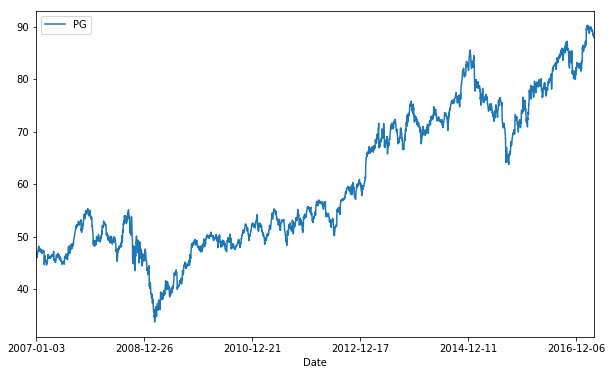

In [4]:
data.plot(figsize=(10, 6));

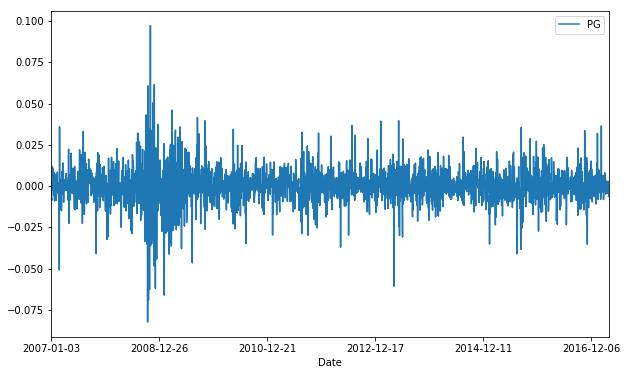

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([ 0.00018236])

In [13]:
drift.values

array([ 0.00018236])

In [14]:
stdev.values

array([ 0.0111381])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[ 0.23037709,  0.49615012],
       [ 0.75977437,  0.07157372],
       [ 0.3332533 ,  0.02380677],
       [ 0.24651902,  0.9749987 ],
       [ 0.47407639,  0.93295845],
       [ 0.52164238,  0.92093077],
       [ 0.10098881,  0.29361556],
       [ 0.98325986,  0.06169508],
       [ 0.05327561,  0.47760227],
       [ 0.62214372,  0.15003251]])

In [17]:
norm.ppf(x)

array([[-0.73760555, -0.00965037],
       [ 0.70557694, -1.46417023],
       [-0.43094743, -1.98080145],
       [-0.68548482,  1.95994179],
       [-0.06502665,  1.49819308],
       [ 0.05427605,  1.41136011],
       [-1.27593746, -0.54285287],
       [ 2.12627611, -1.54069856],
       [-1.61389031, -0.05617231],
       [ 0.31111583, -1.03629398]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.32974632,  0.00523377],
       [ 1.84228011, -0.45031533],
       [-0.76949725,  0.84414906],
       [-1.05811155, -0.0654471 ],
       [-0.05281291,  0.02382759],
       [-0.39937304, -0.66574375],
       [-1.50369564, -1.54696338],
       [ 0.46051519, -0.43372751],
       [ 0.67092719,  0.32088523],
       [ 0.54633166,  0.92302658]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[ 0.99403881,  1.01179312,  0.98230818, ...,  1.02723692,
         0.99966809,  0.99376245],
       [ 0.99503872,  1.00607465,  0.98286193, ...,  1.01541581,
         0.98811061,  0.99354769],
       [ 1.00469659,  0.99673806,  1.01182938, ...,  0.99059814,
         1.01323173,  0.99611647],
       ..., 
       [ 0.98236238,  0.99256304,  0.99544854, ...,  0.99044134,
         0.99031684,  1.00522827],
       [ 0.99311859,  1.00959806,  0.97778788, ...,  1.00262067,
         1.01567382,  1.00467529],
       [ 1.00856955,  0.97769006,  1.00403965, ...,  0.99205955,
         1.00508283,  0.99403001]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [24]:
price_list[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
price_list[0] = S0
price_list

array([[ 88.118629,  88.118629,  88.118629, ...,  88.118629,  88.118629,
         88.118629],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[  88.118629  ,   88.118629  ,   88.118629  , ...,   88.118629  ,
          88.118629  ,   88.118629  ],
       [  87.68144795,   88.65391887,   86.6084454 , ...,   89.47704946,
          87.07095182,   87.55006051],
       [  88.09325169,   88.36473519,   87.63296931, ...,   88.63579914,
          88.22305087,   87.21005703],
       ..., 
       [ 143.59146408,   88.53778755,   99.77397526, ...,  121.09619958,
          56.46088482,   96.88013794],
       [ 142.60335238,   89.38757822,   97.5577841 , ...,  121.41355301,
          57.34584265,   97.33308032],
       [ 143.82539838,   87.39334668,   97.95188329, ...,  120.44947526,
          57.6373216 ,   96.75200327]])

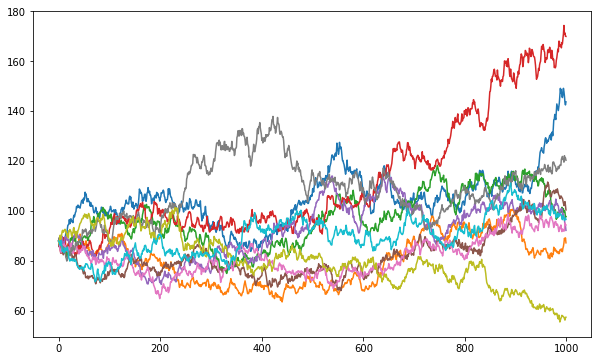

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);